In [3]:
# This is my first notebook on Github, ever, any advice or support would be much appreciated :)
# I will be trying different ML models such as LogisticRegression, RandomForestClassifier, as well as KNN to figure out which works better
# Python 3.9.7

# Data science and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing & Exploring the dataset
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# DATA SHABE?

In [6]:
len(df)

253680

In [7]:
# All features are in a numeric format so we don't have to transform any of our data
df.dtypes.value_counts()

float64    22
dtype: int64

In [8]:
# Checking for missing values
df.isna().sum().sum()

0

In [9]:
# Checking how imbalance our target column is
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [10]:
print(f'Percentage of No Heart Disease/Attack: {round(df["HeartDiseaseorAttack"].value_counts()[0] / len(df) * 100, 2)}%')
print(f'Percentage of Heart Disease/Attacks:   {round(df["HeartDiseaseorAttack"].value_counts()[1] / len(df) * 100, 2)}%')

Percentage of No Heart Disease/Attack: 90.58%
Percentage of Heart Disease/Attacks:   9.42%


In [11]:
# Let's draw some graphs and understand our dataset a little bit
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


(22.5, 0.0)

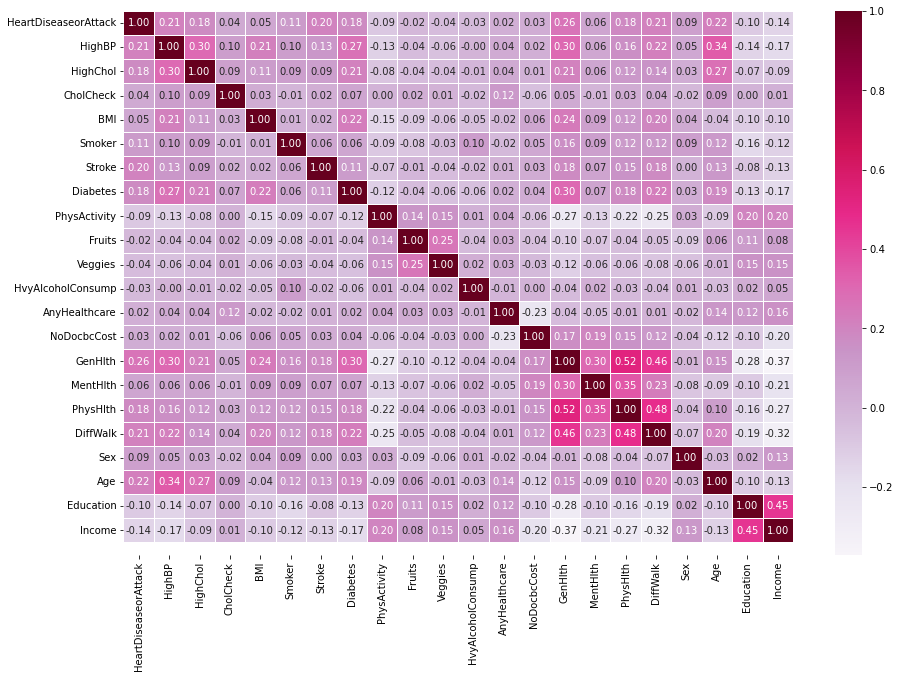

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='PuRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5)

* We can see that certain columns such as **Income** & **Education** have a *strong negative correlation* with our target (HeartDiseaseorAttack) column

In [13]:
# Let's make the models for our data
# Defining our X and y and splitting them into a training set and a testing set

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# The 3 models I've chosen for this dataset

models = {'Logistic Regression': LogisticRegression(solver='liblinear'),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}


def fit_and_score_models(models, X_train, X_test, y_train, y_test):
    """
    A function to fit and evaluate the specified ML models
    """
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [16]:
model_scores = fit_and_score_models(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.9078366445916115,
 'KNN': 0.896050141911069,
 'Random Forest': 0.9021799116997793}

# *** Logistic Regression seems to have scored the highest accuracy**

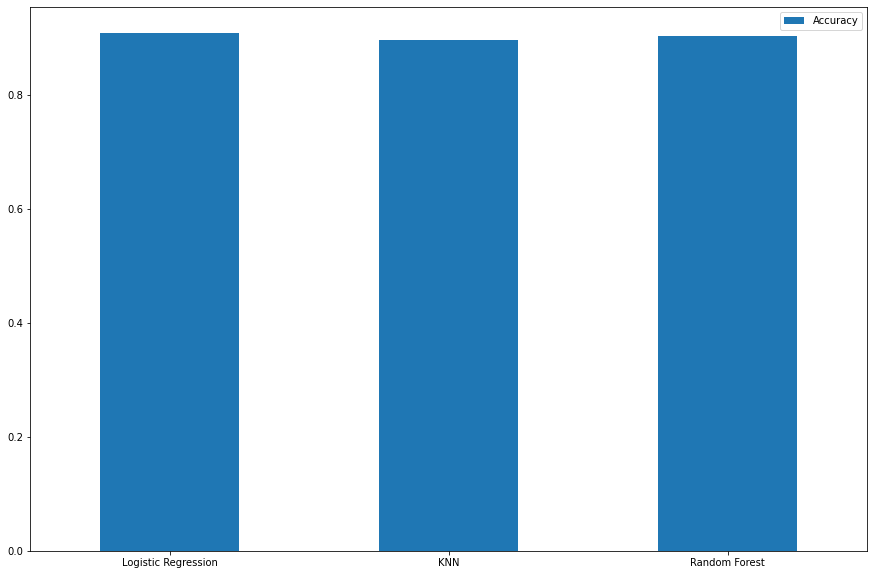

In [17]:
# Let's visualize the data
accuray_comparison_graph = pd.DataFrame(model_scores, index=['Accuracy']).T.plot.bar(figsize=(15,10))
plt.xticks(rotation=0);

In [ ]:
# I'm not quite satistifed with the scores, let's adjust the hyperparameters to see how the models perform
# Creating a grid for the LogisticRegression hyperparameters
logistic_grid = {'C': np.logspace(-4, 4, 20),
                 'solver': ['liblinear']}

# Creating a grid for the RandomForestClassifier hyperparameters
random_forest_grid = {'n_estimators': np.arange(10, 250, 50),
                      'max_depth': [None, 3, 5, 10],
                      'min_samples_split': np.arange(2, 10, 2),
                      'min_samples_leaf': np.arange(1, 10, 2)}

# Using RandomSearchCV to search for random hyperparameters in LogisticRegression
rs_logistic_reg = RandomizedSearchCV(LogisticRegression(),
                                     param_distributions=logistic_grid,
                                     cv=5,
                                     n_iter=20,
                                     verbose=True)

# Fit the model using the new search hyperparams
rs_logistic_reg.fit(X_train, y_train)

### A quick note: [Parallel(n_jobs=1)] as you see above is how many processors the model will use to get trained. The default value is n_jobs=1. If you want it to use ALL processors, set n_jobs=-1 and if you want it to use all but ONE then use n_jobs=-2

For more info refer to the scikit-learn documentation

In [ ]:
# Checking the best parameters for Logistic Regression
rs_logistic_reg.best_params_

In [ ]:
# Let's check the (Hopefully improved) performance
rs_logistic_reg.score(X_test, y_test)

In [ ]:
# Using RandomSearchCV to search for random hyperparameters in RandomForestClassifier
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=random_forest_grid,
                                      cv=5,
                                      n_iter=5,
                                      verbose=True)

# Fit the model using the new search hyperparams
rs_random_forest.fit(X_train, y_train)

In [ ]:
# Checking the best parameters for RandomForestRegression
rs_random_forest.best_params_

In [ ]:
# Not much improvement for either models
rs_random_forest.score(X_test, y_test)

# I will take the best performing model which is the Logistic Regression model and do a GridSearchCV on the hyperparameters to try and improve our model

In [ ]:
logistic_reg_grid = {'C': np.logspace(-4,4,20),
                     'solver': ['liblinear']}

gs_logistic_reg = GridSearchCV(LogisticRegression(),
                               param_grid=logistic_reg_grid,
                               cv=5,
                               verbose=True)

gs_logistic_reg.fit(X_train, y_train)

In [ ]:
gs_logistic_reg.best_params_

In [ ]:
# We got the same results...
gs_logistic_reg.score(X_test, y_test)

# Now that we've tried to better the model's accuracy score, let's experiment with different evaluation metrics such as:
**1. Confusion_matrix**

**2. Precision**

**3. Recall**

**4. ROC and AUC**

**5. F1**

**6. Classification_report**

In [ ]:
# Let's plot a ROC curve which is the comparison of TPR (True Positive Rate) VS FPR (False Positive Rate)

plot_roc_curve(gs_logistic_reg, X_test, y_test);

In [ ]:
# Let's experiment with the confusion matrix
y_preds = gs_logistic_reg.predict(X_test)
cm = confusion_matrix(y_test, y_preds, labels=gs_logistic_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis');


## So according to our confusion matrix we have *497* false positives and *4082* false negatives which is something we don't want while classifing whether someone has a heart disease or not

In [ ]:
# Let's make a Classification report which gives us a combination of evaluation metrics such as (Precision, Recall, F1-score, Support)

print(classification_report(y_test, y_preds))

### The evaluation metrics for those who don't have a heart disease seems solid but if you divert your attention to the patients who do have a heart disease, you can see that we have a recall score of 0.13 which is super low. **Recall** Indicates the proportion of actual positives which were correctly classified. 

* So a model which produces **no false negatives has a recall of 1.0** but as we saw previously, our model has 4083 false negative predictions
* We can pay attention to the **macro average** which is the average precision, recall, and f1-score. If you have class imbalances, which we do in this case, this is the number you want to pay attention to because macro average doesn't take class inbalance into account

## BUT

* The numbers in the **classification report** are calculated on 1 single test split. We will now be performing a cross-validation which means training the model on 5 different versions of training data and also evaluating it on those 5 different versions.

In [ ]:
gs_logistic_reg.best_params_

In [ ]:
# Creating a new model based on the best params
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

In [ ]:
# To see a list of scoring parameters, you could do 'sklearn.metrics.SCORERS.keys()'
params = ['accuracy', 'precision', 'recall', 'f1']
def scoring_params(params):
    for metric in params:
        cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=5, scoring=f'{metric}'))
        print(f'{metric}: {cv_accuracy:.3f}')
    
scoring_params(params)

In [ ]:
# Let's see which features are the most important for our model
clf = LogisticRegression(C=0.23357214690901212,
                         solver='liblinear')

clf.fit(X_train, y_train);

In [ ]:
# How much each feature contributes to predicting our 'target' column which in this case is 'HeartDiseaseorAttack'
clf.coef_

In [ ]:
features = dict(zip(df.columns, list(clf.coef_[0])))
features

In [ ]:
# Let's visualize the data
features_df = pd.DataFrame(features, index=[0]).T.plot.bar(figsize=(20,10), title='Feature Importance')


## Conclusion:

* As we can see that certain features aren't contributing to our 'target' column so to save time in the future while collecting data for a similar purpose, we could elimintate said features that are not contributing as much or at all

* The dataset was very imbalanced and we tried using different classification models but ultimately realized that **LogisticRegresson** gave us the best results

* We also tried adjusting the hyperparameters in order to improve our model which didn't turn out as well as we had hoped